In [1]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')
import param
import hvplot.pandas

In [2]:
btc_tweets = pd.read_csv('BTC_tweets_with_sentiment.csv')
eth_tweets = pd.read_csv('ETH_tweets_with_sentiment.csv')

In [3]:
btc_tweets = btc_tweets[['Date', 'User', 'Followers', 'Sentiment']]
eth_tweets = eth_tweets[['Date', 'User', 'Followers', 'Sentiment']]

In [4]:
btc_tweets['KOL'] = btc_tweets['Followers']>5000

In [5]:
btc_tweets['KOL'] = btc_tweets['KOL'].map({True:'True', False:'False'})

In [6]:
btc_tweets

,Date,User,Followers,Sentiment,KOL
0,2017-09-13,BMouler,6922,1,True
1,2017-09-13,big_blockers,3041,3,False
2,2017-09-13,theperson3233,397,1,False
3,2017-09-13,DisruptBanksy,4490,5,False
4,2017-09-13,JasperJove,182,1,False
...,...,...,...,...,...
16507,2022-11-09,big_blockers,3041,1,False
16508,2022-11-09,japaneur,357,4,False
16509,2022-11-09,crypt0potamus,492,2,False
16510,2022-11-09,CStackamoto,392,1,False


In [7]:
def set_num2_sentiment(row):
    if row == 1:
        return "Negative"
    elif row == 2:
        return "Slightly Negative"
    elif row == 3:
        return "Neutrel"
    elif row == 4:
        return "Slightly Positive"
    elif row == 5:
        return "Positive"

In [8]:
btc_tweets['Sentiment'] = btc_tweets['Sentiment'].apply(set_num2_sentiment)

In [9]:
btc_idf = btc_tweets.interactive()

In [10]:
date_slider = pn.widgets.DiscreteSlider(
    name = "date slider",
    options = list(btc_tweets['Date'].unique())
)

In [11]:
date_slider

DiscreteSlider(name='date slider', options=['2017-09-13', ...], value='2017-09-13')

In [12]:
yaxis_KOL = pn.widgets.RadioButtonGroup(
    name = 'KOL',
    options=['True','False'],
    button_type='success'
)

In [13]:
yaxis_KOL

RadioButtonGroup(button_type='success', name='KOL', options=['True', 'False'], value='True')

In [14]:
btc_bar_pipeline = (
    btc_idf[
        (btc_idf.Date == date_slider)&
        (btc_idf.KOL == yaxis_KOL)
    ]
    .groupby(['Date','KOL','Sentiment']).size()
    .to_frame()
    .reset_index()
)

In [15]:
btc_bar_pipeline

In [16]:
btc_bar_plot = btc_bar_pipeline.hvplot(kind='bar', x='Sentiment', y=0, title='Split by if followers > 5000')
btc_bar_plot

In [17]:
btc_bar_pipeline_all_KOL = (
    btc_idf[
            (btc_idf.Date == date_slider)
        ]
        .groupby(['Date','Sentiment']).size()
        .to_frame()
        .reset_index()
)

In [18]:
btc_bar_pipeline_all_KOL

In [19]:
btc_bar_plot_all_KOL = btc_bar_pipeline_all_KOL.hvplot(kind='bar', x='Sentiment', y=0, title='All tweets')

In [20]:
btc_bar_plot_all_KOL

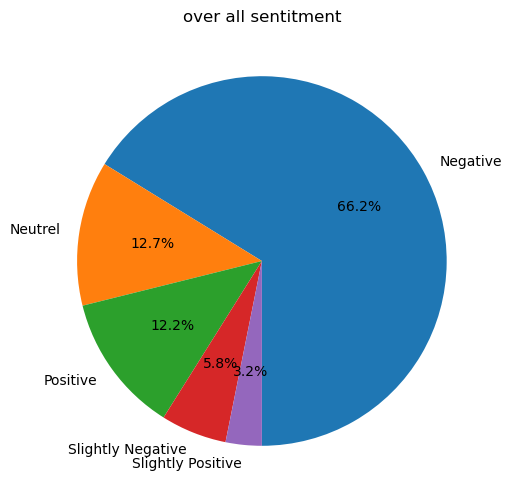

In [40]:
import matplotlib.pyplot as plt
sentiment_counts = btc_tweets.groupby('Sentiment').size()
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=10, title='over all sentitment', label='')
sentiment_counts_plot = pn.pane.Matplotlib(fig, dpi=260)

Matplotlib(Figure)
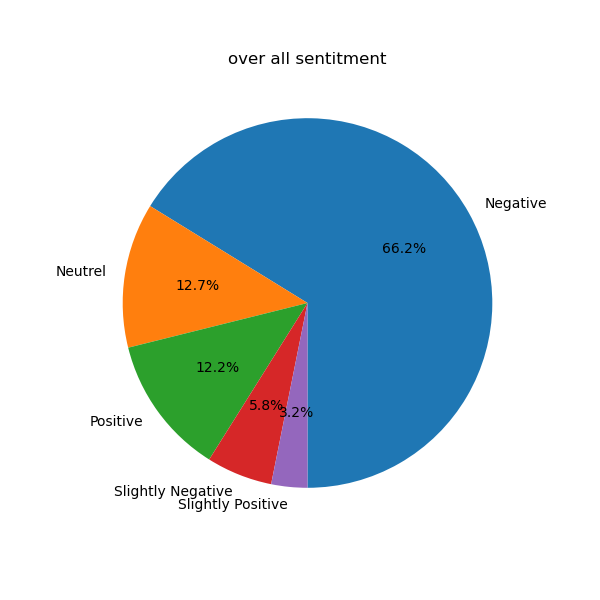

In [41]:
sentiment_counts_plot

In [22]:
btc_price = pd.read_csv('BTC_price.csv')

In [23]:
btc_price = btc_price[['Close time', 'price']]

In [24]:
btc_price.rename(columns={'Close time':'Date'}, inplace=True)

In [25]:
btc_price_idf = btc_price.interactive()

In [26]:
btc_price

,Date,price
0,2017-08-17,4285.08
1,2017-08-18,4108.37
2,2017-08-19,4139.98
3,2017-08-20,4086.29
4,2017-08-21,4016.00
...,...,...
1961,2022-12-30,16607.48
1962,2022-12-31,16542.40
1963,2023-01-01,16616.75
1964,2023-01-02,16672.87


In [27]:
btc_price['Date'][btc_price['Date']=='2023-01-01']

1963    2023-01-01
Name: Date, dtype: object

In [28]:
date_price_slider = pn.widgets.DiscreteSlider(
    name = "date and price slider",
    options = list(btc_price['Date'].unique())
)

In [29]:
btc_price_pipeline = (
    btc_price_idf[
        (btc_price_idf.Date <= date_price_slider)
    ]
)

In [30]:
btc_price_table = btc_price_pipeline.pipe(pn.widgets.Tabulator, pagination = 'remote', page_size=10)

In [31]:
btc_price_table

In [32]:
btc_price_plot = btc_price_pipeline.hvplot(x='Date', y='price', size=200, title='btc price graph')

In [33]:
btc_price_plot

In [34]:
from panel.template import DarkTheme

In [35]:
template = pn.template.FastListTemplate(
    title = 'Tweets Sentiment Analysis of BTC Price',
    sidebar = [pn.pane.Markdown('# Selected 1000 tweets for each big drop or bump'),
               pn.pane.JPG('OIP.jpg', sizing_mode='scale_both'),
              date_slider,
              date_price_slider],
    main = [
            pn.Row(pn.Column(date_price_slider,btc_price_plot.panel(width=1000), margin=(0,25)), btc_price_table.panel(width=600)),
            pn.Row(pn.Column(date_slider,yaxis_KOL,btc_bar_plot.panel(width=1000),btc_bar_plot_all_KOL.panel(width=1000)),sentiment_counts_plot)
           ],
    accent_base_color = '#AE0000',
    header_background = '#AE0000',
)

FastListTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [139816585939600] Row
        [0] Column(margin=(0, 25))
            [0] ParamFunction(function, width=1000)
        [1] ParamFunction(function, width=600)
    [139816584516464] Row
        [0] Column
            [0] ParamFunction(function, width=1000)
            [1] ParamFunction(function, width=1000)
    [139816585730320] Markdown(str)
    [139816585730080] JPG(str, sizing_mode='scale_both')
    [139816604101984] DiscreteSlider(name='date slider', options=['2017-09-13', ...], value='2017-09-13')
    [139816585140352] DiscreteSlider(name='date and price slider', options=['2017-08-17', ...], value='2017-08-17')
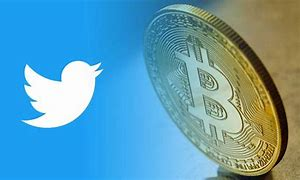

In [36]:
template.servable()